<a href="https://colab.research.google.com/github/bcandraas/Data-Analyst-Portfolio/blob/main/Proj_2%20Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Intermediate Assignment: https://docs.google.com/document/d/1LcBE-UdA17RPU8E-zRZbMdNkwUb-Yb4xB9n4GA1SxfM/edit#

# Cleaning the data 
     a.Removing irrelevant values
     b.Handling missing values
     c.Removing duplicate values
     d.Remove outliers
     e.Converting data types
          i.string:if there are typos or abnormal string data,it needs to be
              transformed
          ii.timeseries:time series column is read as time series(not string)
     f.Combine the dataset into single dataset

## Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import timedelta

## Read File Input


In [ ]:
df_order= pd.read_csv('/content/sample_data/orders_dataset.csv')
df_order

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [ ]:
df_payment = pd.read_csv('/content/sample_data/order_payments_dataset.csv')
df_payment

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [ ]:
df_cust = pd.read_csv('/content/sample_data/customers_dataset.csv')
df_cust

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


## Handling Missing Values

In all dataset; orders, payments and customers, I use all columns so there are no irrelevant values.

In [ ]:
df_order.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [ ]:
df_payment.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [ ]:
df_cust.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [ ]:
df_order[df_order.isnull().any(axis=1)]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaN,2018-06-28 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaN,2018-08-21 00:00:00
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaN,2017-10-03 00:00:00
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaN,2018-02-07 00:00:00
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaN,NaN,2018-02-06 00:00:00
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaN,NaN,NaN,2018-09-27 00:00:00
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaN,NaN,2017-09-15 00:00:00


In [ ]:
dfc_order = df_order.copy()
dfc_payment = df_payment.copy()
dfc_cust = df_cust.copy()
dfc_order.dropna(axis=0,inplace=True)
print(dfc_order.shape)
dfc_order.head()

(96461, 8)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


## Removing Duplicate Values

In [ ]:
dfc_order.duplicated().sum()

0

In [ ]:
dfc_payment.duplicated().sum()

0

In [ ]:
dfc_cust.duplicated().sum()

0

## Converting Data Types

In [ ]:
dfc_order.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       96461 non-null  object
 1   customer_id                    96461 non-null  object
 2   order_status                   96461 non-null  object
 3   order_purchase_timestamp       96461 non-null  object
 4   order_approved_at              96461 non-null  object
 5   order_delivered_carrier_date   96461 non-null  object
 6   order_delivered_customer_date  96461 non-null  object
 7   order_estimated_delivery_date  96461 non-null  object
dtypes: object(8)
memory usage: 6.6+ MB


In [ ]:
dfc_order['order_purchase_timestamp'] = pd.to_datetime(dfc_order['order_purchase_timestamp'],format='%Y-%m-%d', errors='coerce')
dfc_order['order_approved_at'] = pd.to_datetime(dfc_order['order_approved_at'],format='%Y-%m-%d', errors='coerce')
dfc_order['order_delivered_carrier_date'] = pd.to_datetime(dfc_order['order_delivered_carrier_date'],format='%Y-%m-%d', errors='coerce')
dfc_order['order_delivered_customer_date'] = pd.to_datetime(dfc_order['order_delivered_customer_date'],format='%Y-%m-%d', errors='coerce')
dfc_order['order_estimated_delivery_date'] = pd.to_datetime(dfc_order['order_estimated_delivery_date'],format='%Y-%m-%d', errors='coerce')
dfc_order.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96461 non-null  object        
 1   customer_id                    96461 non-null  object        
 2   order_status                   96461 non-null  object        
 3   order_purchase_timestamp       96461 non-null  datetime64[ns]
 4   order_approved_at              96461 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96461 non-null  datetime64[ns]
 6   order_delivered_customer_date  96461 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96461 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB


In [ ]:
dfc_order['order_status'].unique()

array(['delivered', 'canceled'], dtype=object)

In [ ]:
dfc_payment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [ ]:
dfc_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


## Remove outliers

In [ ]:
q1 = dfc_payment['payment_value'].quantile(.25)
q3 = dfc_payment['payment_value'].quantile(.75)
iqr = q3-q1

UIF = q3 + (1.5*iqr)
LIF = q1 - (1.5*iqr)

print('iqr',iqr)
print('UIF',UIF)
print('LIF',LIF)

iqr 115.04750000000001
UIF 344.40875000000005
LIF -115.78125000000003


In [ ]:
dfc_payment.shape

(103886, 5)

In [ ]:
dfc_payment= dfc_payment[(dfc_payment['payment_value']<=UIF) & (dfc_payment['payment_value']>=LIF)]
dfc_payment.shape

(95905, 5)

## Merge Dataset

In [ ]:
dfc_order.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96461 non-null  object        
 1   customer_id                    96461 non-null  object        
 2   order_status                   96461 non-null  object        
 3   order_purchase_timestamp       96461 non-null  datetime64[ns]
 4   order_approved_at              96461 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96461 non-null  datetime64[ns]
 6   order_delivered_customer_date  96461 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96461 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB


In [ ]:
dfc_payment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95905 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   order_id              95905 non-null  object 
 1   payment_sequential    95905 non-null  int64  
 2   payment_type          95905 non-null  object 
 3   payment_installments  95905 non-null  int64  
 4   payment_value         95905 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.4+ MB


In [ ]:
dfc_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [ ]:
dataset = pd.merge(pd.merge(dfc_order,df_payment,on='order_id'),dfc_cust,on='customer_id')
dataset

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,credit_card,1,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,3,voucher,1,2.00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2,voucher,1,18.59,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,boleto,1,141.46,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,credit_card,3,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100734,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,1,credit_card,3,85.08,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP
100735,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,1,credit_card,3,195.00,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP
100736,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,1,credit_card,5,271.01,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA
100737,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,1,credit_card,4,441.16,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100739 entries, 0 to 100738
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       100739 non-null  object        
 1   customer_id                    100739 non-null  object        
 2   order_status                   100739 non-null  object        
 3   order_purchase_timestamp       100739 non-null  datetime64[ns]
 4   order_approved_at              100739 non-null  datetime64[ns]
 5   order_delivered_carrier_date   100739 non-null  datetime64[ns]
 6   order_delivered_customer_date  100739 non-null  datetime64[ns]
 7   order_estimated_delivery_date  100739 non-null  datetime64[ns]
 8   payment_sequential             100739 non-null  int64         
 9   payment_type                   100739 non-null  object        
 10  payment_installments           100739 non-null  int64         
 11  

In [ ]:
dataset.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
dtype: int64

In [ ]:
dataset.duplicated().sum()

0

In [ ]:
dataset.shape

(100739, 16)

# EDA using Python 
     a. Evaluate the descriptive statistic. What can we understand about the data? Please provide your insight
     b. Visualize the order dataset and check if there is some pattern on the time series data.
          1. Number of orders per month
          2. Daily orders trend (which day of the week is the busiest)
          3. Percentage of orders per payment type
          4. Top 10 States with the Most Customers

## Descriptive Statistics

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100739 entries, 0 to 100738
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       100739 non-null  object        
 1   customer_id                    100739 non-null  object        
 2   order_status                   100739 non-null  object        
 3   order_purchase_timestamp       100739 non-null  datetime64[ns]
 4   order_approved_at              100739 non-null  datetime64[ns]
 5   order_delivered_carrier_date   100739 non-null  datetime64[ns]
 6   order_delivered_customer_date  100739 non-null  datetime64[ns]
 7   order_estimated_delivery_date  100739 non-null  datetime64[ns]
 8   payment_sequential             100739 non-null  int64         
 9   payment_type                   100739 non-null  object        
 10  payment_installments           100739 non-null  int64         
 11  

In [ ]:
dt_stat = dataset[['payment_sequential', 'payment_installments', 'payment_value']].describe()
dt_stat

,payment_sequential,payment_installments,payment_value
count,100739.000000,100739.000000,100739.000000
mean,1.088387,2.851894,153.065673
std,0.652783,2.684496,214.465614
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.780000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.290000
max,26.000000,24.000000,13664.080000


In [ ]:
dt_stat.loc['kurtosis'] = dt_stat.kurt()
dt_stat.loc['skewness'] = dt_stat.skew()
dt_stat.loc['variance'] = dt_stat.var()
dt_stat

,payment_sequential,payment_installments,payment_value
count,1.007390e+05,1.007390e+05,1.007390e+05
mean,1.088387e+00,2.851894e+00,1.530657e+02
std,6.527827e-01,2.684496e+00,2.144656e+02
min,1.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,1.000000e+00,5.678000e+01
50%,1.000000e+00,1.000000e+00,1.000000e+02
75%,1.000000e+00,4.000000e+00,1.712900e+02
max,2.600000e+01,2.400000e+01,1.366408e+04
kurtosis,7.999999e+00,7.999999e+00,7.555829e+00
skewness,3.000000e+00,3.000000e+00,2.902611e+00


In [ ]:
pd.set_option('display.float_format',  '{:,}'.format)
dt_stat = round(dt_stat, 2)
dt_stat

,payment_sequential,payment_installments,payment_value
count,"100,739.0","100,739.0","100,739.0"
mean,1.09,2.85,153.07
std,0.65,2.68,214.47
min,1.0,0.0,0.0
25%,1.0,1.0,56.78
50%,1.0,1.0,100.0
75%,1.0,4.0,171.29
max,26.0,24.0,"13,664.08"
kurtosis,8.0,8.0,7.56
skewness,3.0,3.0,2.9


In [ ]:
dataset['payment_installments'].value_counts()

1     50912
2     12078
3     10163
4      6889
10     5150
5      5095
8      4136
6      3804
7      1563
9       618
12      128
15       72
18       27
11       22
24       18
20       16
13       15
14       14
17        7
16        5
21        3
0         2
23        1
22        1
Name: payment_installments, dtype: int64

In [ ]:
dataset[['payment_type','customer_state','customer_city']].describe()

,payment_type,customer_state,customer_city
count,100739,100739,100739
unique,4,27,4085
top,credit_card,SP,sao paulo
freq,74584,42296,15696


Insight:

1.   Total orders by 100739, which the smallest is 0 USD and the largest is 13,664 USD with an average of 153.07 USD. From the value of kurtosis (7.56) , it indicates that the peak distribution of the data is too high (value greater than 3), and skewness shows a positive number of 2.9 indicating that it's a positive skewness, so there are more payment value in small amounts compared to large ones. 
2.   Most number of installments chosen by customer is 1 times with mean 2 or 3 times.
3.   The most common type of payment is using credit card (74% of total orders)
4.   The biggest customer, based on state, are from SP (42% of total orders)
5.   The biggest customer, based on city, are from Sao Paulo (16% of total orders)




## Number of Orders Per Month

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100739 entries, 0 to 100738
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       100739 non-null  object        
 1   customer_id                    100739 non-null  object        
 2   order_status                   100739 non-null  object        
 3   order_purchase_timestamp       100739 non-null  datetime64[ns]
 4   order_approved_at              100739 non-null  datetime64[ns]
 5   order_delivered_carrier_date   100739 non-null  datetime64[ns]
 6   order_delivered_customer_date  100739 non-null  datetime64[ns]
 7   order_estimated_delivery_date  100739 non-null  datetime64[ns]
 8   payment_sequential             100739 non-null  int64         
 9   payment_type                   100739 non-null  object        
 10  payment_installments           100739 non-null  int64         
 11  

In [ ]:
dataset2 = dataset.copy()
dataset2['month'] = dataset2['order_approved_at'].dt.month
dataset2['year'] = dataset2['order_approved_at'].dt.year
dataset2

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,month,year
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,credit_card,1,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,10,2017
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,3,voucher,1,2.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,10,2017
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2,voucher,1,18.59,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,10,2017
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,boleto,1,141.46,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,7,2018
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,credit_card,3,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,8,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100734,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,1,credit_card,3,85.08,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,3,2017
100735,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,1,credit_card,3,195.0,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,2,2018
100736,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,1,credit_card,5,271.01,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,8,2017
100737,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,1,credit_card,4,441.16,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,1,2018


In [ ]:
dt_totalorder = dataset2.groupby([dataset2['year'], dataset2['month']])['order_id'].agg('count').reset_index()

dt_totalorder["period"] = dt_totalorder["year"].astype(str) + '-' +dt_totalorder["month"].astype(str)
dt_totalorder.drop(['year', 'month'], axis=1, inplace=True)

dt_totalorder = dt_totalorder[['period', 'order_id']]

dt_totalorder.rename(columns = {'order_id':'total_orders'}, inplace = True)
dt_totalorder

,period,total_orders
0,2016-10,287
1,2016-12,1
2,2017-1,763
3,2017-2,1735
4,2017-3,2708
5,2017-4,2411
6,2017-5,3788
7,2017-6,3329
8,2017-7,4102
9,2017-8,4419


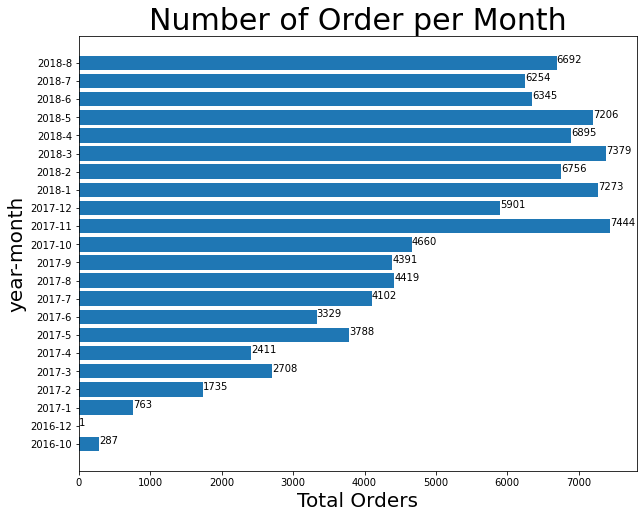

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Number of Order per Month',fontsize=30)
plt.xlabel('Total Orders',fontsize=20)
plt.ylabel('year-month',fontsize=20)

x = dt_totalorder['period']
y = dt_totalorder['total_orders']

plt.barh(x, y)
for index, value in enumerate(y):
    plt.text(value, index,
             str(value))
plt.show()

**Based on the graph, the largest order is in October 2017 with 7444 orders and the smallest order is in December 2016 with 1 order.**

## Daily Orders Trend (which day of the week is the busiest)

In [ ]:
dataset2['day'] = dataset2['order_approved_at'].dt.strftime('%A')
dataset2

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,month,year,day
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,credit_card,1,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,10,2017,Monday
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,3,voucher,1,2.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,10,2017,Monday
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2,voucher,1,18.59,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,10,2017,Monday
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,boleto,1,141.46,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,7,2018,Thursday
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,credit_card,3,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,8,2018,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100734,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,1,credit_card,3,85.08,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,3,2017,Thursday
100735,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,1,credit_card,3,195.0,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,2,2018,Tuesday
100736,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,1,credit_card,5,271.01,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,8,2017,Sunday
100737,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,1,credit_card,4,441.16,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,1,2018,Monday


In [ ]:
dt_dailyorder = dataset2.groupby([dataset2['day']])['order_id'].agg('count').reset_index()
dt_dailyorder.rename(columns = {'order_id':'total_orders'}, inplace = True)
dt_dailyorder

,day,total_orders
0,Friday,14886
1,Monday,13296
2,Saturday,12354
3,Sunday,9144
4,Thursday,15677
5,Tuesday,19342
6,Wednesday,16040


In [ ]:
sorter = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
sorterIndex = dict(zip(sorter,range(len(sorter))))
dt_dailyorder['day_id'] = dt_dailyorder['day'].map(sorterIndex)

dt_dailyorder.sort_values(by='day_id',ascending=True,inplace=True)
dt_dailyorder

,day,total_orders,day_id
3,Sunday,9144,0
1,Monday,13296,1
5,Tuesday,19342,2
6,Wednesday,16040,3
4,Thursday,15677,4
0,Friday,14886,5
2,Saturday,12354,6


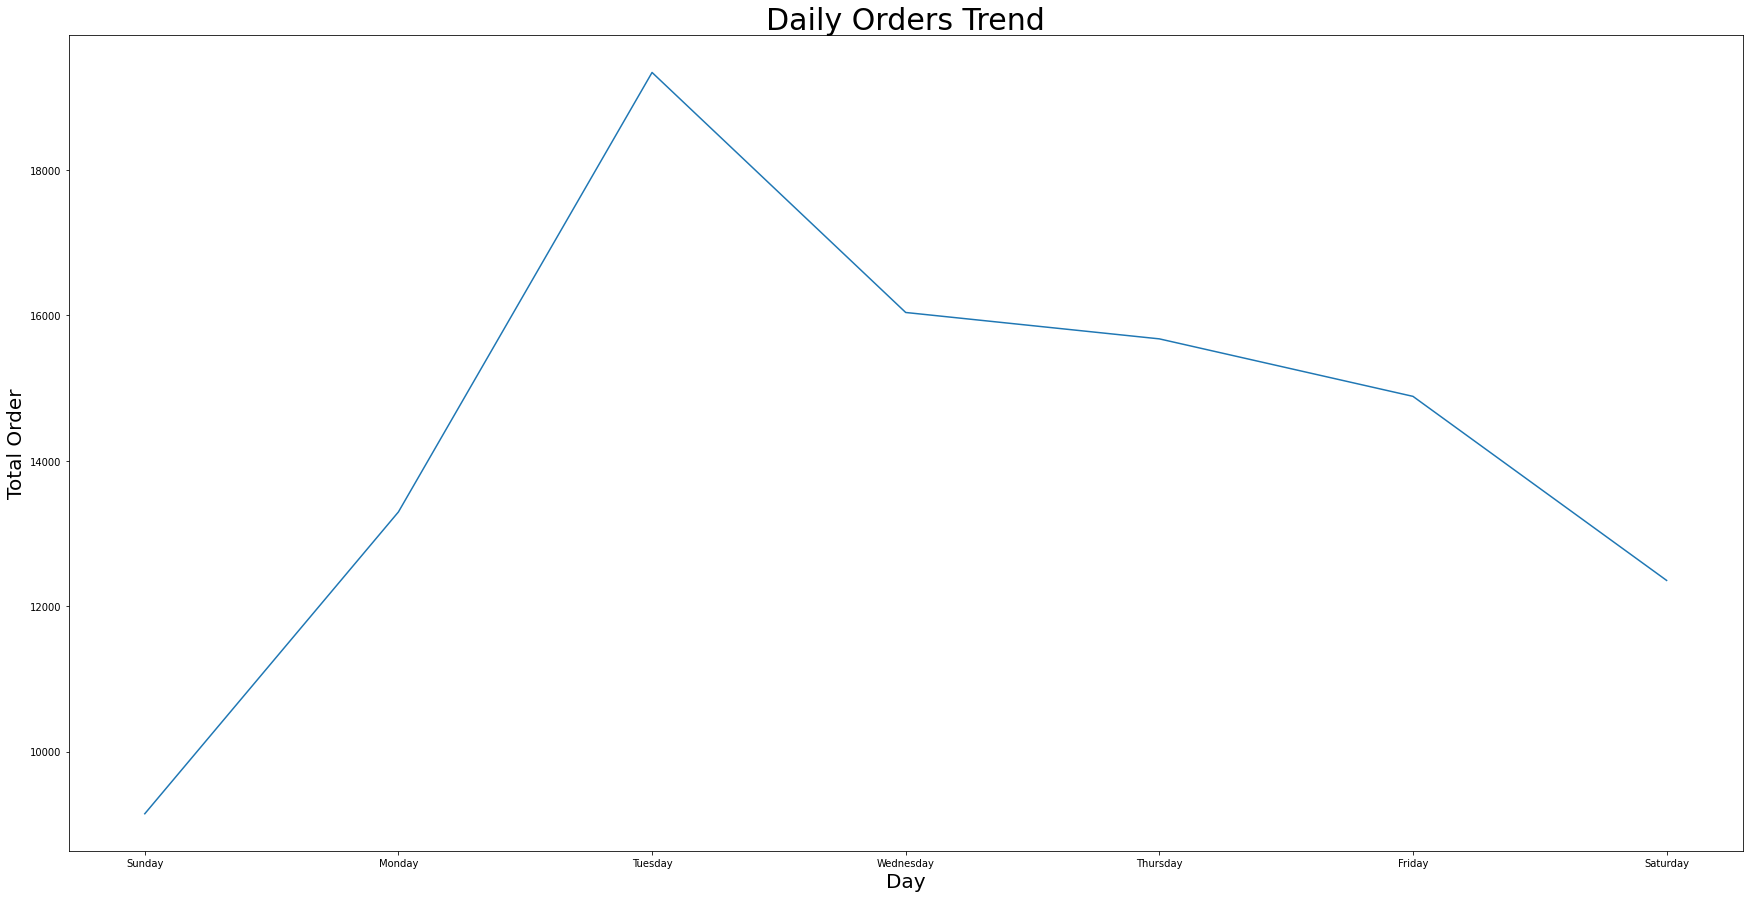

In [ ]:
plt.figure(figsize=(30,15))
plt.title('Daily Orders Trend',fontsize=30)
plt.xlabel('Day',fontsize=20)
plt.ylabel('Total Order',fontsize=20)

x = dt_dailyorder['day']
y = dt_dailyorder['total_orders']

plt.plot(x,y)
plt.show()

**Based on the graph, the busiest day of the week is Tuesday and the least busy day of the week is Sunday**

## Percentage of Orders per Payment Type

In [ ]:
dt_percentorder = dataset2.groupby('payment_type')['order_id'].agg('nunique').reset_index()

dt_percentorder.rename(columns = {'order_id':'total_orders'}, inplace = True)
dt_percentorder

,payment_type,total_orders
0,boleto,19177
1,credit_card,74302
2,debit_card,1484
3,voucher,3679


In [ ]:
dt_percentorder.sort_values(by='total_orders',ascending=False,inplace=True)
dt_percentorder

,payment_type,total_orders
1,credit_card,74302
0,boleto,19177
3,voucher,3679
2,debit_card,1484


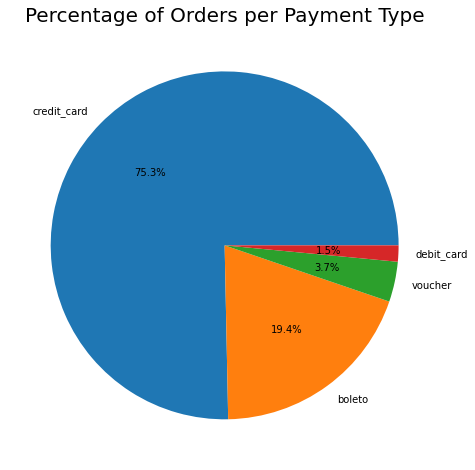

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Percentage of Orders per Payment Type',fontsize=20)
plt.pie(dt_percentorder['total_orders'],labels=dt_percentorder['payment_type'],
        autopct='%1.1f%%')
plt.show()

**Based on the chart, credit card payment type dominate the proportion of 75,3%**

## Top 10 States with the Most Customers

In [ ]:
dt_state = dataset2.groupby('customer_state')['customer_id'].agg('count').reset_index()
dt_state.sort_values(by='customer_id',ascending=False,inplace=True)
dt_state.rename(columns = {'customer_id':'total_customers'}, inplace = True)
dt_state

,customer_state,total_customers
25,SP,42296
18,RJ,13005
10,MG,11802
22,RS,5541
17,PR,5129
23,SC,3662
4,BA,3483
6,DF,2142
7,ES,2068
8,GO,2047


In [ ]:
dt_state = dt_state.head(10)
dt_state

,customer_state,total_customers
25,SP,42296
18,RJ,13005
10,MG,11802
22,RS,5541
17,PR,5129
23,SC,3662
4,BA,3483
6,DF,2142
7,ES,2068
8,GO,2047


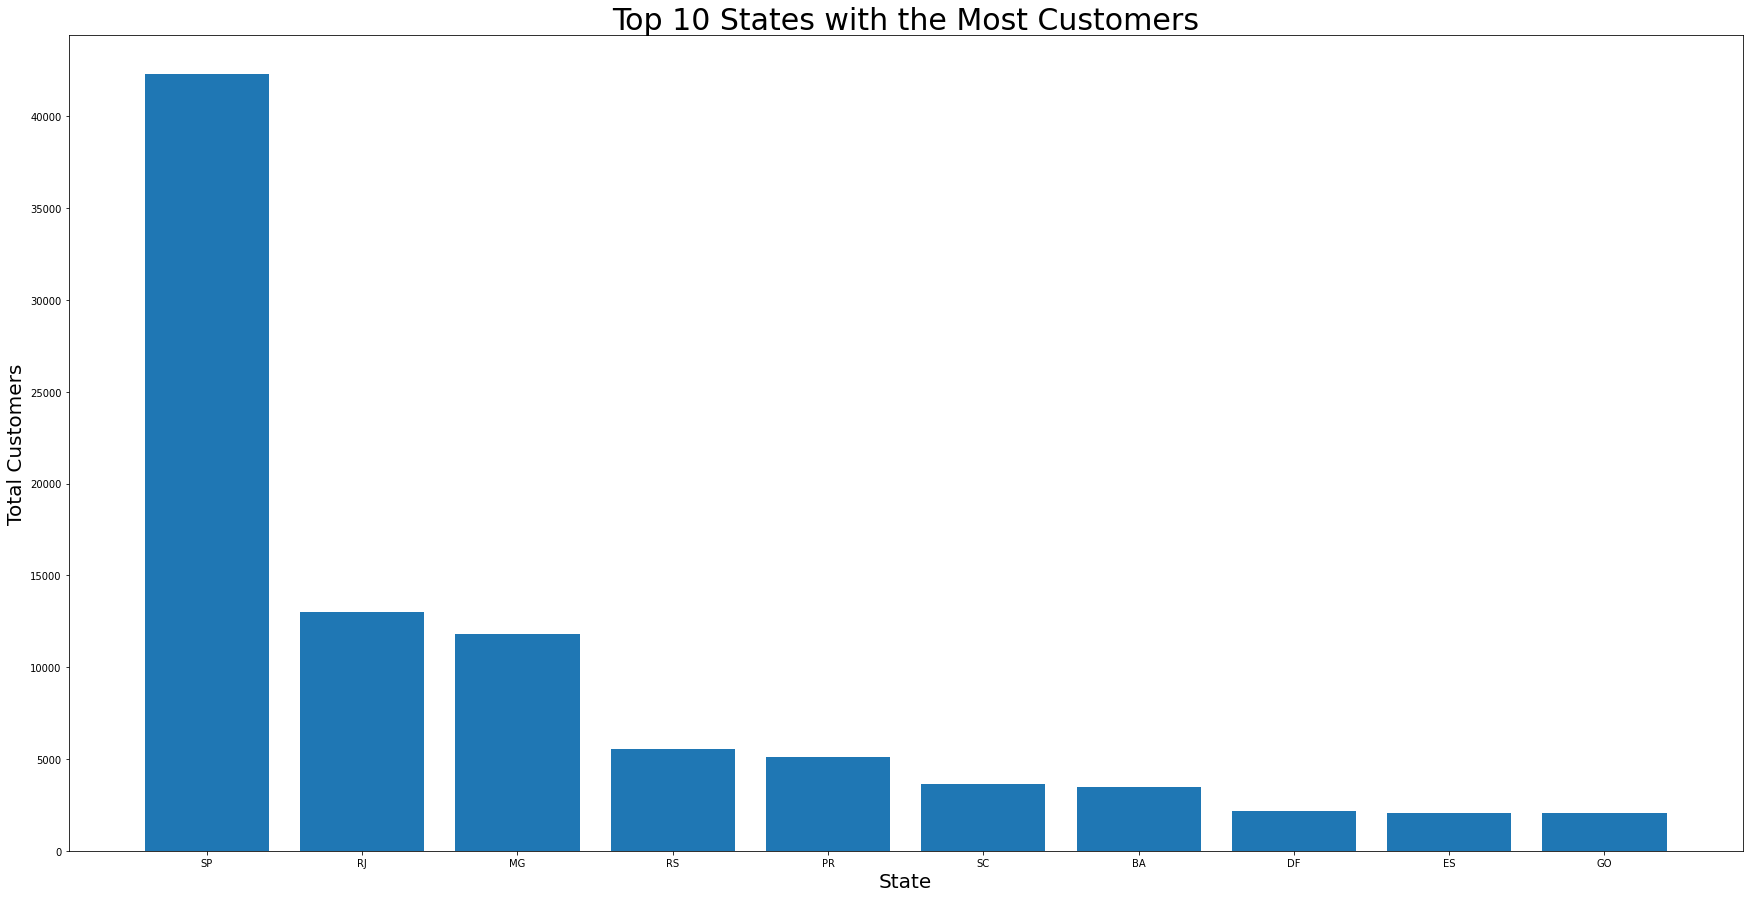

In [ ]:
plt.figure(figsize=(30,15))
plt.title('Top 10 States with the Most Customers',fontsize=30)
plt.xlabel('State',fontsize=20)
plt.ylabel('Total Customers',fontsize=20)

x = dt_state['customer_state']
y = dt_state['total_customers']

plt.bar(x,y)
plt.show()

**From the chart, SP is the state that has the most customers compared to other states.**